# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ahmad Fuad Fauzi
- **Email:** ahmadfuadfauzi13@gmail.com
- **ID Dicoding:** ahmadfuadfauzi

## Menentukan Pertanyaan Bisnis

- Kota mana yang secara konsisten memiliki kualitas udara terburuk/terbaik berdasarkan rata-rata PM2.5

- Bagaimana tren kualitas udara (fokus pada PM2.5 dan PM10) di setiap kota selama beberapa tahun terakhir? Apakah ada perbaikan atau penurunan yang signifikan?

- Bagaimana pengaruh kondisi cuaca (suhu, tekanan, kelembaban, angin) terhadap tingkat polusi di setiap kota?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [13]:
#load data
list_path = [
    'data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'data/PRSA_Data_Changping_20130301-20170228.csv',
    'data/PRSA_Data_Dingling_20130301-20170228.csv',
    'data/PRSA_Data_Dongsi_20130301-20170228.csv',
    'data/PRSA_Data_Guanyuan_20130301-20170228.csv',
    'data/PRSA_Data_Gucheng_20130301-20170228.csv',
    'data/PRSA_Data_Huairou_20130301-20170228.csv',
    'data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'data/PRSA_Data_Shunyi_20130301-20170228.csv',
    'data/PRSA_Data_Tiantan_20130301-20170228.csv',
    'data/PRSA_Data_Wanliu_20130301-20170228.csv',
    'data/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
    ]

list_df = []
for path in list_path:
    try:
        df = pd.read_csv(path)
        list_df.append(df)
        print(f"Berhasil mengimpor: {path.split('/')[-1]}")
    except Exception as e:
        print(f"Gagal mengimpor {path.split('/')[-1]}: {e}")

Berhasil mengimpor: PRSA_Data_Aotizhongxin_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Changping_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Dingling_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Dongsi_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Guanyuan_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Gucheng_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Huairou_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Nongzhanguan_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Shunyi_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Tiantan_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Wanliu_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [9]:
if list_df:
    all_df = pd.concat(list_df, ignore_index=True)
    print("\nSemua file berhasil digabungkan menjadi 'all_df'.")
else:
    print("\nTidak ada file CSV yang berhasil diimpor.")


Tidak ada file CSV yang berhasil diimpor.


### Assessing Data

In [34]:
#function for data summary
def assess_data_summary(df):
    print("="*40)
    print("🔍 Ringkasan Umum Data")
    print("="*40)
    print(f"Jumlah baris: {df.shape[0]}")
    print(f"Jumlah kolom: {df.shape[1]}")
    print(f"Jumlah duplikat: {df.duplicated().sum()}")

    print("\n📌 Tipe Data Tiap Kolom:")
    print(df.dtypes)

    print("\n📌 Jumlah Nilai Null per Kolom:")
    nulls = df.isnull().sum()
    print(nulls[nulls > 0] if nulls.sum() > 0 else "Tidak ada nilai null.")

    print("\n📌 Ringkasan Statistik Kolom Numerik:")
    print(df.describe().T[['mean', 'std', 'min', 'max']])

    print("\n📌 Kolom Unik Bernilai Kategori:")
    for col in df.select_dtypes(include='object').columns:
        print(f"{col}: {df[col].nunique()} nilai unik")
        if df[col].nunique() <= 10:
            print(f"  → {df[col].unique()}")

    if 'station' in df.columns:
        print("\n📌 Distribusi Jumlah Data per Kota (Kolom 'station'):")
        print(df['station'].value_counts().head())
        print("...")
        print(df['station'].value_counts().tail())

    print("="*40)
    print("✅ Assessing selesai!\n")

assess_data_summary(all_df)


🔍 Ringkasan Umum Data
Jumlah baris: 420768
Jumlah kolom: 18
Jumlah duplikat: 0

📌 Tipe Data Tiap Kolom:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

📌 Jumlah Nilai Null per Kolom:
PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64

📌 Ringkasan Statistik Kolom Numerik:
               mean           std        min      max
No     17532.500000  10122.116943     1.0000  35064.0
year    2014.662560      1.177198  2013.0000   2017.0
month      6.522930      3.448707     1.0000     12.0
day       15.729637      8.800102     1.0000     31.0
hour   

**Insight:**
- Jumlah baris: 420768
- Jumlah kolom: 18
- Jumlah duplikat: 0
- Jumlah Nilai Null per Kolom:
  - PM2.5 = 8739
  - PM10  =    6449
  - SO2  =     9021
  - NO2  =   12116
  - CO   =  20701
  - O3   = 13277
  - TEMP =  398
  - PRES = 393
  - DEWP = 403
  - RAIN = 390
  - wd   = 1822
  - WSPM = 318
- Tiap kota memiliki 35064 baris data

In [35]:
#function for detect outliers
def detect_outliers_iqr(df, cols, verbose=True):
    outlier_summary = {}


    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_count = outliers.shape[0]
        outlier_summary[col] = {
            'jumlah_outlier': outlier_count,
            'persentase_outlier': round(outlier_count / len(df) * 100, 2),
            'batas_bawah': lower,
            'batas_atas': upper
        }
        if verbose:
            print(f"📌 Kolom: {col}")
            print(f"  Jumlah outlier: {outlier_count} ({round(outlier_count / len(df) * 100, 2)}%)")
            print(f"  Batas bawah: {lower:.2f}, Batas atas: {upper:.2f}\n")

    return outlier_summary

detect_outliers_iqr(all_df, all_df.select_dtypes(include='number').columns, verbose=True)

📌 Kolom: No
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -17530.50, Batas atas: 52595.50

📌 Kolom: year
  Jumlah outlier: 0 (0.0%)
  Batas bawah: 2011.00, Batas atas: 2019.00

📌 Kolom: month
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -5.00, Batas atas: 19.00

📌 Kolom: day
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -14.50, Batas atas: 45.50

📌 Kolom: hour
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -11.50, Batas atas: 34.50

📌 Kolom: PM2.5
  Jumlah outlier: 19142 (4.55%)
  Batas bawah: -116.50, Batas atas: 247.50

📌 Kolom: PM10
  Jumlah outlier: 14658 (3.48%)
  Batas bawah: -127.50, Batas atas: 308.50

📌 Kolom: SO2
  Jumlah outlier: 35566 (8.45%)
  Batas bawah: -22.50, Batas atas: 45.50

📌 Kolom: NO2
  Jumlah outlier: 7021 (1.67%)
  Batas bawah: -49.00, Batas atas: 143.00

📌 Kolom: CO
  Jumlah outlier: 28054 (6.67%)
  Batas bawah: -1000.00, Batas atas: 3000.00

📌 Kolom: O3
  Jumlah outlier: 16599 (3.94%)
  Batas bawah: -95.50, Batas atas: 188.50

📌 Kolom: TEMP
  Jumlah outlier: 0 (0.0%)
  Bata

{'No': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-17530.5),
  'batas_atas': np.float64(52595.5)},
 'year': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(2011.0),
  'batas_atas': np.float64(2019.0)},
 'month': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-5.0),
  'batas_atas': np.float64(19.0)},
 'day': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-14.5),
  'batas_atas': np.float64(45.5)},
 'hour': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-11.5),
  'batas_atas': np.float64(34.5)},
 'PM2.5': {'jumlah_outlier': 19142,
  'persentase_outlier': 4.55,
  'batas_bawah': np.float64(-116.5),
  'batas_atas': np.float64(247.5)},
 'PM10': {'jumlah_outlier': 14658,
  'persentase_outlier': 3.48,
  'batas_bawah': np.float64(-127.5),
  'batas_atas': np.float64(308.5)},
 'SO2': {'jumlah_outlier': 35566,
  'persentase_outlier': 8.45

In [36]:
# visualize outliers
def visualize_outliers_boxplot(df, cols_with_outliers):
    """
    Memvisualisasikan outlier menggunakan boxplot di Seaborn.

    Args:
        df (pd.DataFrame): DataFrame input.
        cols_with_outliers (list): Daftar kolom yang ingin Anda periksa outlier-nya.

    Returns:
        None
    """

    numerical_df = df.select_dtypes(include='number')

    cols_to_plot = [col for col in cols_with_outliers if col in numerical_df.columns]

    num_cols = len(cols_to_plot)
    if num_cols > 0:
        rows = (num_cols + 2) // 3
        fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))

        for i, col in enumerate(cols_to_plot):
            row_index = i // 3
            col_index = i % 3
            sns.boxplot(y=numerical_df[col], ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Boxplot {col}', fontsize=10)
            axes[row_index, col_index].set_ylabel(col, fontsize=8)
            axes[row_index, col_index].tick_params(axis='y', labelsize=7)

        if num_cols % 3 != 0:
            for j in range(num_cols % 3, 3):
                fig.delaxes(axes[rows - 1, j])

        plt.tight_layout()
        plt.show()
    else:
        print("Tidak ada kolom dengan outlier yang ditemukan dalam data numerik.")

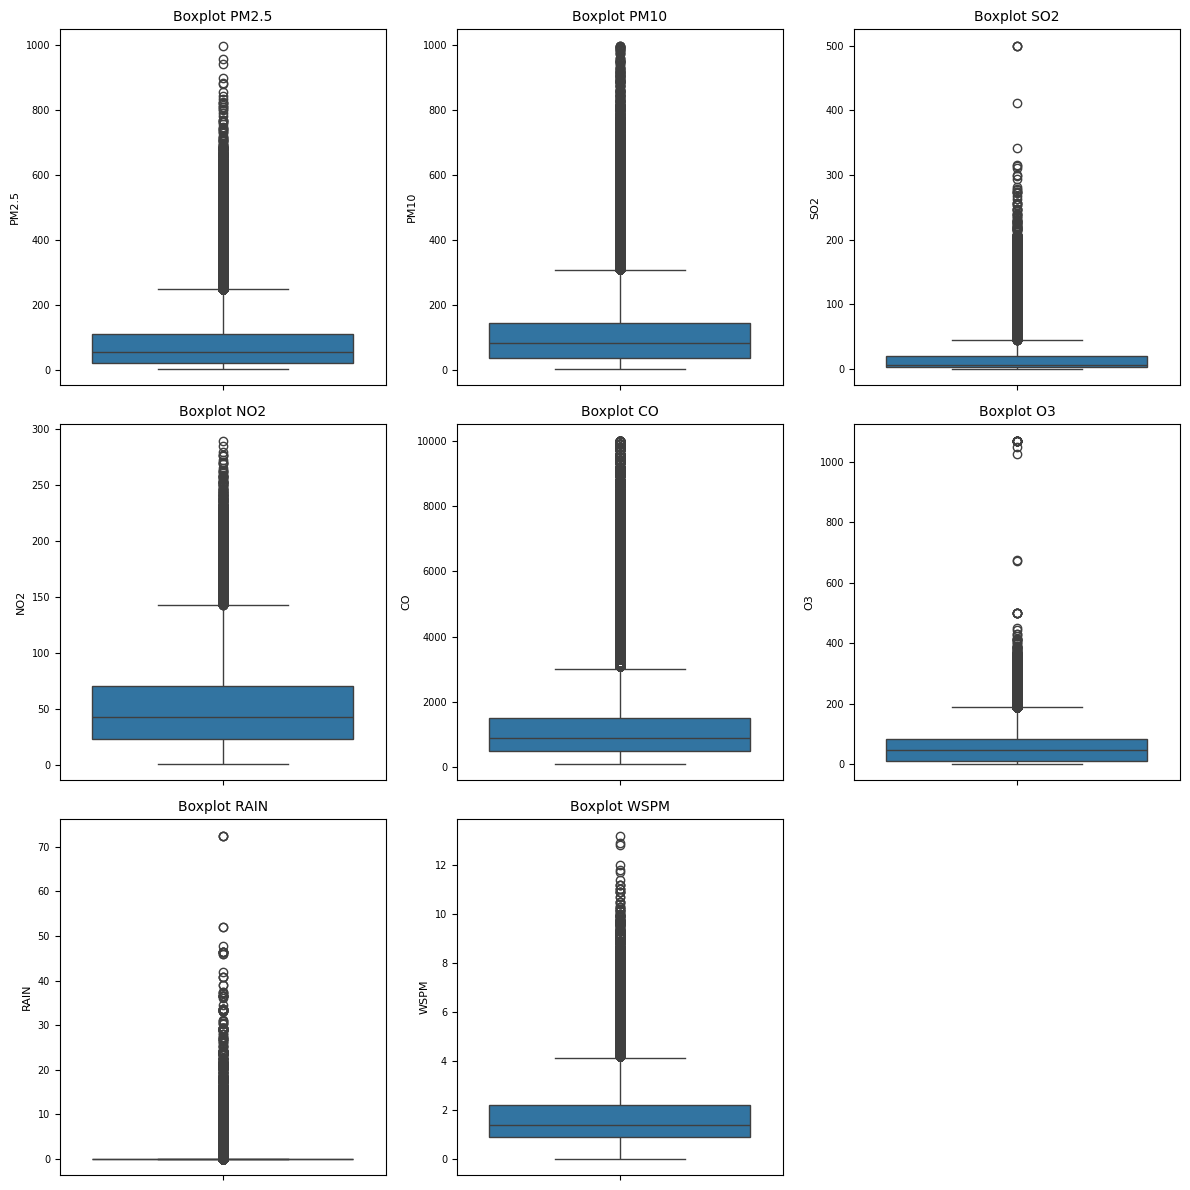

In [37]:
cols_with_outliers = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']
visualize_outliers_boxplot(all_df, cols_with_outliers)

### Cleaning Data

In [38]:
#drop irrelevant column (column 'No')
all_df.drop('No', axis=1, inplace=True)

In [39]:
#fill null with interpolate method
all_df.interpolate(method='linear', inplace=True)
all_df.info()

<ipython-input-39-a797967e70eb>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_df.interpolate(method='linear', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [40]:
def remove_outliers_iqr_iterative(df, max_iter=15):
    """
    Menghapus outlier dari DataFrame menggunakan metode IQR secara iteratif sampai tidak ada lagi outlier
    atau mencapai batas iterasi maksimum.

    Args:
        df (pd.DataFrame): DataFrame input.
        max_iter (int): Maksimal jumlah iterasi.

    Returns:
        pd.DataFrame: DataFrame setelah outlier dihapus.
    """
    df_cleaned = df.copy()
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

    for _ in range(max_iter):
        rows_before = df_cleaned.shape[0]
        for col in numeric_cols:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        rows_after = df_cleaned.shape[0]
        if rows_before == rows_after:
            break  # keluar jika sudah tidak ada baris yang dihapus
    return df_cleaned

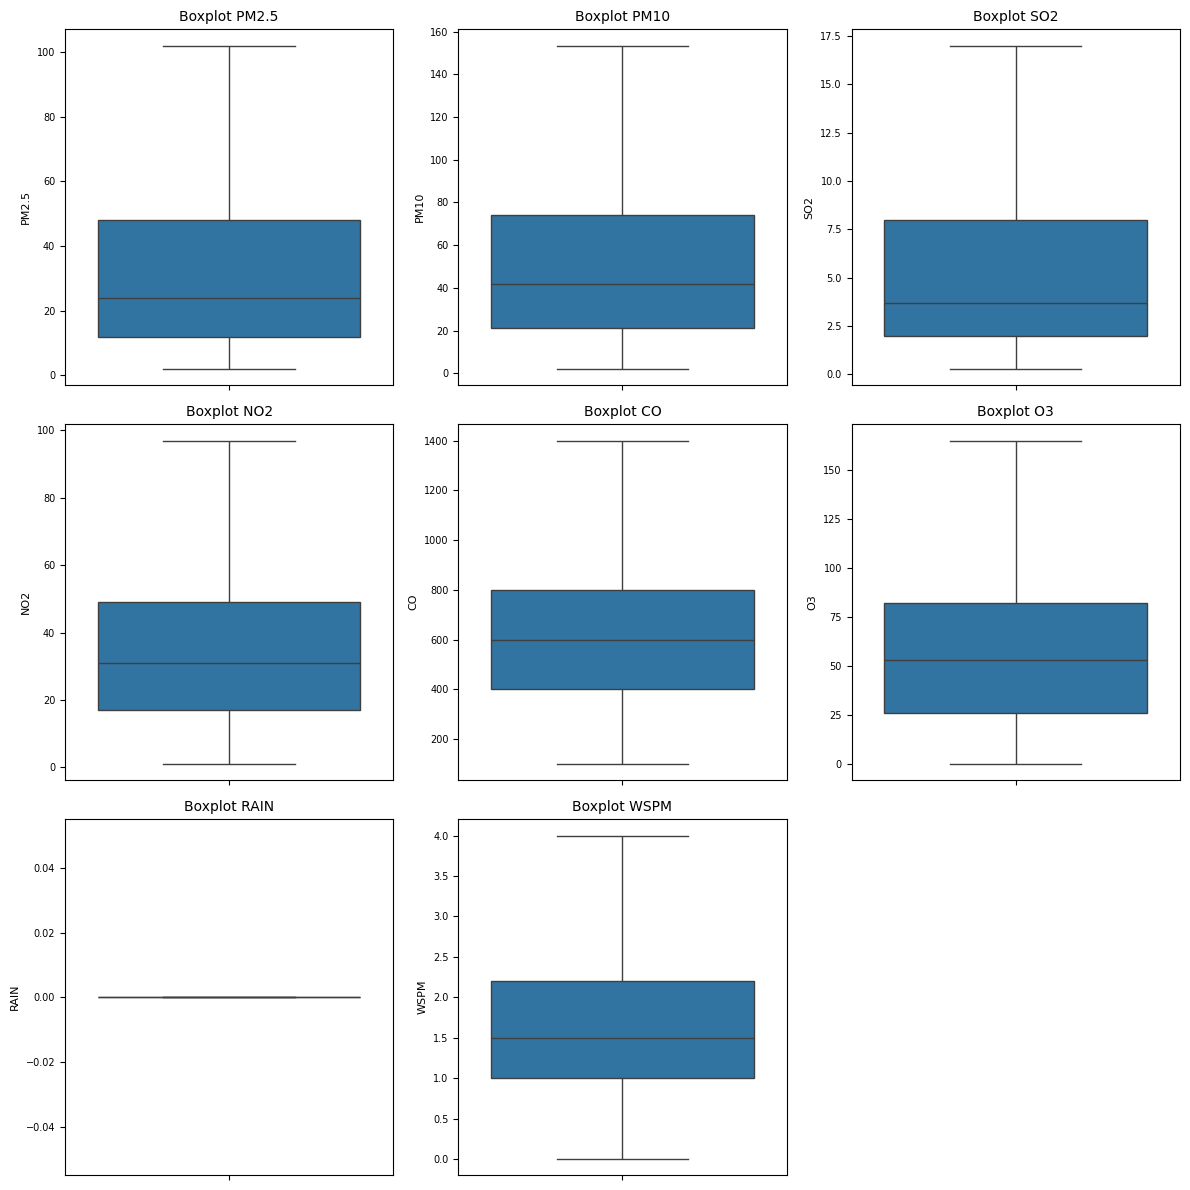

In [41]:
#panggil fungsi hapus outlier
clean_all_df = remove_outliers_iqr_iterative(all_df)

visualize_outliers_boxplot(clean_all_df, cols_with_outliers)

**Dokumentasi:**
- Menghapus kolom 'No' karena tidak digunakan dalam analisis
- Mengisi nilai kosong dengan metode interpolate
- Menghapus outlier

## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
#average polutans by city
avg_by_city = clean_all_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().round(2)
avg_by_city = avg_by_city.sort_values(by='PM2.5', ascending=False)
display(avg_by_city)

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Tiantan,33.92,52.92,5.48,41.46,669.34,52.23
Guanyuan,33.56,52.61,5.79,42.35,632.70,53.95
Dongsi,33.15,49.69,6.00,38.90,670.76,57.94
Wanshouxigong,32.93,52.70,5.40,39.23,670.84,56.55
Gucheng,32.58,57.38,5.12,36.59,634.36,60.58
Shunyi,32.53,47.35,4.73,31.09,571.39,53.01
Wanliu,32.36,52.04,6.40,45.27,612.71,50.62
Aotizhongxin,32.24,49.72,6.05,41.48,591.22,57.11
Changping,32.03,49.99,5.07,32.06,605.53,58.26


In [43]:
#average PM2.5 by city
avg_pm25_by_city = clean_all_df.groupby('station')['PM2.5'].mean().round(2)
avg_pm25_by_city = avg_pm25_by_city.sort_values(ascending=False)
display(avg_pm25_by_city)

,PM2.5
station,
Tiantan,33.92
Guanyuan,33.56
Dongsi,33.15
Wanshouxigong,32.93
Gucheng,32.58
Shunyi,32.53
Wanliu,32.36
Aotizhongxin,32.24
Changping,32.03


In [44]:
#Rata-rata Harian PM2.5 per Kota
avg_daily_pm25 = clean_all_df.groupby(['station', 'year', 'month', 'day'])['PM2.5'].mean().round(2)
avg_daily_pm25 = avg_daily_pm25.reset_index()
display(avg_daily_pm25.head(20))

,station,year,month,day,PM2.5
0,Aotizhongxin,2013,3,1,7.25
1,Aotizhongxin,2013,3,2,3.00
2,Aotizhongxin,2013,3,3,31.50
3,Aotizhongxin,2013,3,4,13.80
4,Aotizhongxin,2013,3,9,11.00
5,Aotizhongxin,2013,3,10,14.00
6,Aotizhongxin,2013,3,12,88.00
7,Aotizhongxin,2013,3,13,13.94
8,Aotizhongxin,2013,3,14,62.80
9,Aotizhongxin,2013,3,18,16.00


In [45]:
#Average polutan by city by year
avg_city_year = clean_all_df.groupby(['station', 'year'])[['PM2.5', 'PM10', 'SO2', 'NO2']].mean().round(2)
avg_city_year = avg_city_year.reset_index()
display(avg_city_year)


,station,year,PM2.5,PM10,SO2,NO2
0,Aotizhongxin,2013,32.92,53.54,7.76,45.69
1,Aotizhongxin,2014,35.14,52.94,6.38,44.09
2,Aotizhongxin,2015,30.46,49.71,5.31,42.83
3,Aotizhongxin,2016,32.74,47.78,5.05,36.90
4,Aotizhongxin,2017,19.69,29.62,8.72,35.08
5,Changping,2013,32.07,48.82,6.15,29.99
6,Changping,2014,33.24,54.31,5.39,33.69
7,Changping,2015,32.95,49.80,4.32,30.85
8,Changping,2016,31.39,49.88,4.38,33.92
9,Changping,2017,22.94,32.72,8.35,27.73


In [46]:
#average PM2.5 and PM10 by month all cities
clean_all_df['datetime'] = pd.to_datetime(clean_all_df[['year', 'month', 'day', 'hour']])
monthly_avg = clean_all_df.groupby(pd.Grouper(key='datetime', freq='ME'))[['PM2.5', 'PM10']].mean().round(2)
display(monthly_avg.head(24))

,PM2.5,PM10
datetime,,
2013-03-31,25.05,36.74
2013-04-30,27.20,48.82
2013-05-31,42.34,72.94
2013-06-30,38.01,53.71
2013-07-31,38.23,53.22
2013-08-31,37.57,51.38
2013-09-30,36.86,54.84
2013-10-31,33.52,52.67
2013-11-30,18.87,35.43


In [47]:
#average PM2.5 and PM10 by month by city
monthly_city_avg = clean_all_df.groupby(['station', 'year', 'month'])[['PM2.5', 'PM10']].mean().round(2)
monthly_city_avg = monthly_city_avg.reset_index()
display(monthly_city_avg.head(20))

,station,year,month,PM2.5,PM10
0,Aotizhongxin,2013,3,27.34,40.62
1,Aotizhongxin,2013,4,21.58,48.85
2,Aotizhongxin,2013,5,42.14,81.82
3,Aotizhongxin,2013,6,43.66,56.68
4,Aotizhongxin,2013,7,39.33,59.88
5,Aotizhongxin,2013,8,40.02,58.71
6,Aotizhongxin,2013,9,37.14,59.56
7,Aotizhongxin,2013,10,32.77,52.21
8,Aotizhongxin,2013,11,16.11,34.44
9,Aotizhongxin,2013,12,13.90,28.32


In [48]:
#average PM2.5 by temperature
temp_pm25 = clean_all_df.groupby(pd.cut(all_df['TEMP'], bins=10))['PM2.5'].mean().round(2)
display(temp_pm25)

<ipython-input-48-f10628fe59aa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_pm25 = clean_all_df.groupby(pd.cut(all_df['TEMP'], bins=10))['PM2.5'].mean().round(2)


,PM2.5
TEMP,
"(-19.961, -13.75]",10.86
"(-13.75, -7.6]",17.96
"(-7.6, -1.45]",18.71
"(-1.45, 4.7]",22.62
"(4.7, 10.85]",29.12
"(10.85, 17.0]",33.17
"(17.0, 23.15]",37.53
"(23.15, 29.3]",40.23
"(29.3, 35.45]",29.47


In [49]:
#average PM2.5 by WSPM
wspm_pm25 = clean_all_df.groupby(pd.cut(all_df['WSPM'], bins=10))['PM2.5'].mean().round(2).sort_values(ascending=False)
display(wspm_pm25)

<ipython-input-49-f4bc008a63ac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wspm_pm25 = clean_all_df.groupby(pd.cut(all_df['WSPM'], bins=10))['PM2.5'].mean().round(2).sort_values(ascending=False)


,PM2.5
WSPM,
"(-0.0132, 1.32]",38.41
"(1.32, 2.64]",30.54
"(2.64, 3.96]",20.21
"(3.96, 5.28]",17.00
"(5.28, 6.6]",NaN
"(6.6, 7.92]",NaN
"(7.92, 9.24]",NaN
"(9.24, 10.56]",NaN
"(10.56, 11.88]",NaN


In [50]:
#correlation between variabel
correlation_table = clean_all_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr().round(2)
display(correlation_table)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
PM2.5,1.00,0.76,0.17,0.43,0.67,-0.03,0.24,-0.26,0.44,-0.27
PM10,0.76,1.00,0.22,0.49,0.51,-0.01,0.22,-0.24,0.31,-0.19
SO2,0.17,0.22,1.00,0.24,0.24,-0.06,-0.27,0.26,-0.29,0.07
NO2,0.43,0.49,0.24,1.00,0.54,-0.47,0.00,0.00,0.19,-0.36
CO,0.67,0.51,0.24,0.54,1.00,-0.25,0.03,-0.06,0.31,-0.33
O3,-0.03,-0.01,-0.06,-0.47,-0.25,1.00,0.45,-0.32,0.14,0.30
TEMP,0.24,0.22,-0.27,0.00,0.03,0.45,1.00,-0.82,0.82,-0.08
PRES,-0.26,-0.24,0.26,0.00,-0.06,-0.32,-0.82,1.00,-0.77,0.19
DEWP,0.44,0.31,-0.29,0.19,0.31,0.14,0.82,-0.77,1.00,-0.38
WSPM,-0.27,-0.19,0.07,-0.36,-0.33,0.30,-0.08,0.19,-0.38,1.00


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kota mana yang secara konsisten memiliki kualitas udara terburuk/terbaik berdasarkan rata-rata PM2.5


<ipython-input-51-c439d900ae59>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pm25.values, y=avg_pm25.index, palette='plasma')


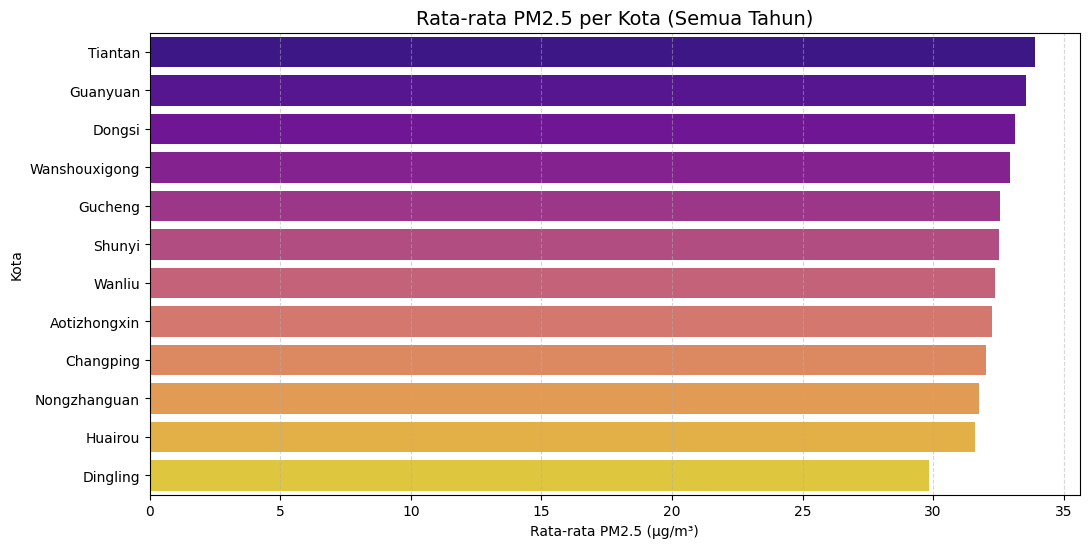

In [51]:
avg_pm25 = clean_all_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pm25.values, y=avg_pm25.index, palette='plasma')
plt.title('Rata-rata PM2.5 per Kota (Semua Tahun)', fontsize=14)
plt.xlabel('Rata-rata PM2.5 (µg/m³)')
plt.ylabel('Kota')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Pertanyaan 2:

Bagaimana tren kualitas udara (fokus pada PM2.5 dan PM10) di setiap kota selama beberapa tahun terakhir? Apakah ada perbaikan atau penurunan yang signifikan?

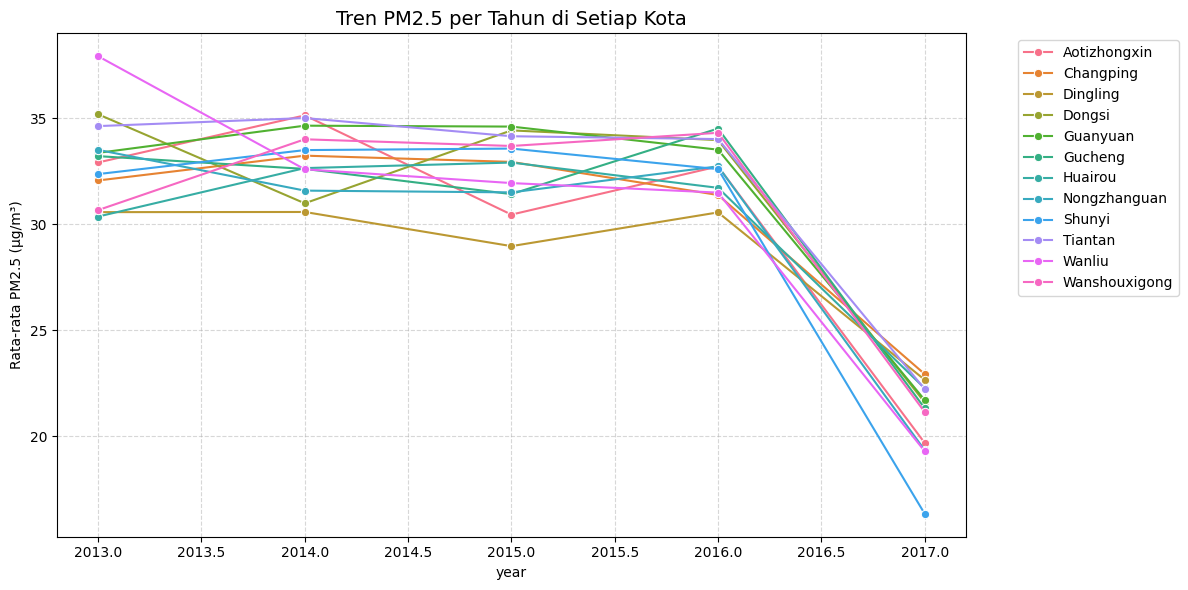

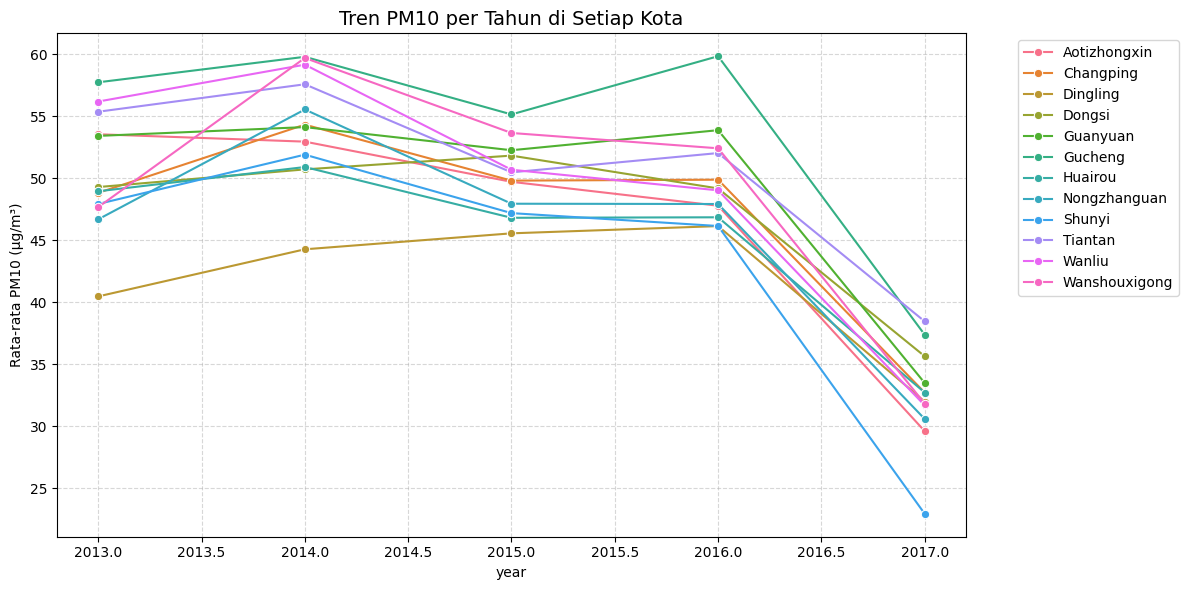

In [52]:
pm_trend = clean_all_df.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

# Visualisasi PM2.5
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm_trend, x='year', y='PM2.5', hue='station', marker='o')
plt.title('Tren PM2.5 per Tahun di Setiap Kota', fontsize=14)
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualisasi PM10
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm_trend, x='year', y='PM10', hue='station', marker='o')
plt.title('Tren PM10 per Tahun di Setiap Kota', fontsize=14)
plt.ylabel('Rata-rata PM10 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###Pertanyaan 3:

Bagaimana pengaruh kondisi cuaca (suhu, tekanan, kelembaban, angin) terhadap tingkat polusi di setiap kota?

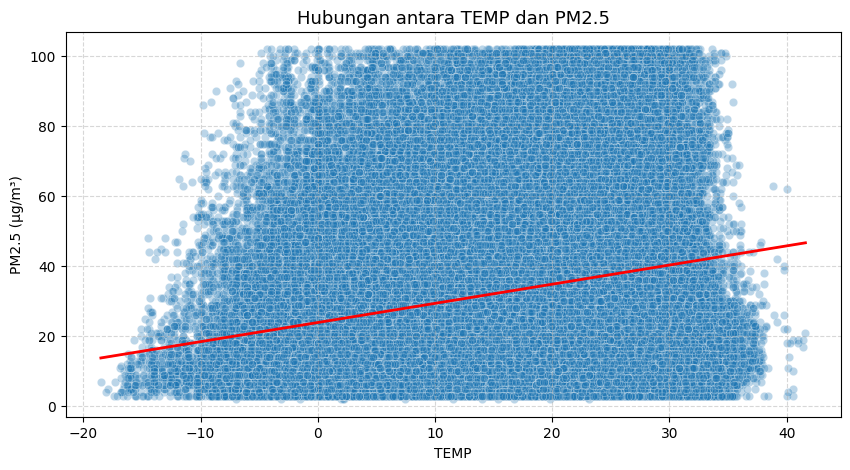

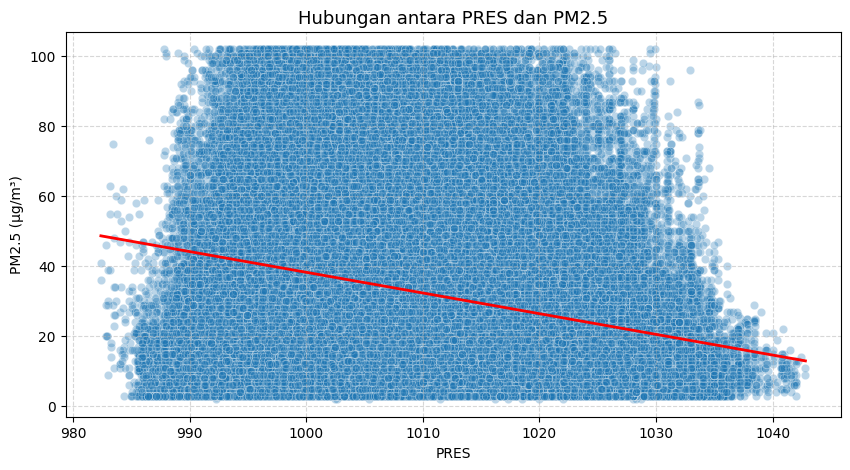

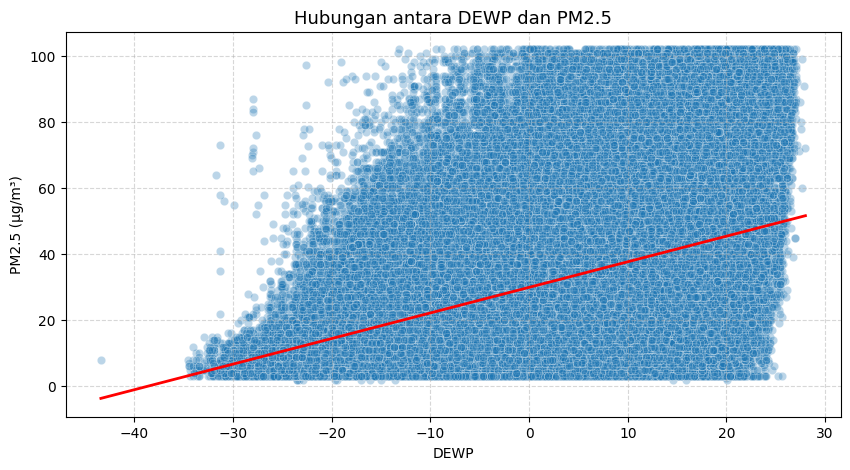

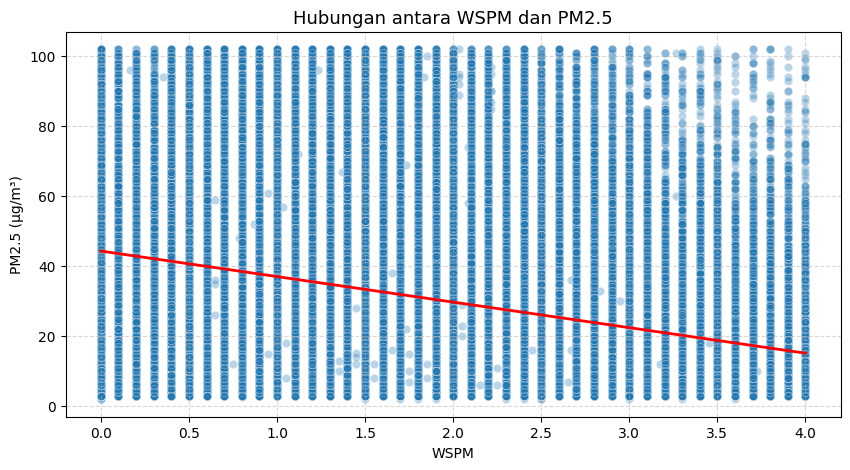

In [53]:
weather_vars = ['TEMP', 'PRES', 'DEWP', 'WSPM']
for var in weather_vars:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=clean_all_df, x=var, y='PM2.5', alpha=0.3)
    sns.regplot(data=clean_all_df, x=var, y='PM2.5', scatter=False, color='red', line_kws={"linewidth":2})
    plt.title(f'Hubungan antara {var} dan PM2.5', fontsize=13)
    plt.xlabel(var)
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

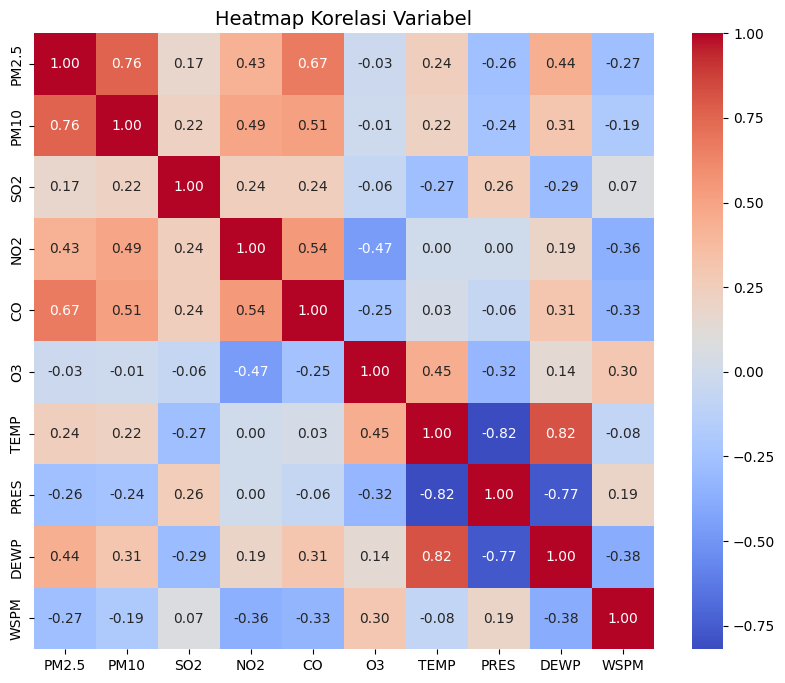

In [54]:
#visualize heatmap correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel', fontsize=14)
plt.show()

**Insight:**
---

## Analisis Lanjutan (Opsional)

## **Kesimpulan**

### 1. Kota dengan Kualitas Udara Terburuk/Terbaik (berdasarkan rata-rata PM2.5)
- **Terburuk:**
  - **Tiantan**: 33.92 µg/m³
  - **Guanyuan**: 33.56 µg/m³
  - **Dongsi**: 33.15 µg/m³
- **Terbaik:**
  - **Dingling**: 29.84 µg/m³



### 2. Tren Kualitas Udara (PM2.5 & PM10) Tahunan
- Terjadi **penurunan signifikan** pada nilai PM2.5 dan PM10 di tahun **2017** dibandingkan tahun 2013–2016.
- Ini menandakan adanya **perbaikan kualitas udara**, kemungkinan besar karena kebijakan lingkungan atau pengurangan aktivitas industri/kendaraan.



### 3. Pengaruh Cuaca terhadap Polusi (berdasarkan Heatmap Korelasi)
- **Tekanan udara (PRES):** Korelasi **-0.26** terhadap PM2.5 → semakin tinggi tekanan, polusi cenderung menurun.
- **Suhu (TEMP):** Korelasi **-0.24** terhadap PM2.5 → suhu tinggi cenderung menurunkan kadar polusi.
- **Kecepatan angin (WSPM):** Korelasi **-0.27** → angin membantu menghilangkan partikel polusi.
- **Kelembaban (DEWP):** Korelasi **+0.44** → kelembaban tinggi dapat memerangkap polutan di udara.

---

## **Saran Strategis (Solusi Bisnis dan Kebijakan)**

### 1. Fokus Intervensi pada Kota dengan Polusi Tertinggi
- Prioritaskan **Tiantan, Guanyuan, dan Dongsi**.
- Lakukan:
  - Pembatasan kendaraan bermotor berbahan bakar fosil.
  - Program penghijauan dan taman kota.



### 2. Pertahankan & Replikasi Kebijakan Efektif
- Audit dan identifikasi kebijakan yang menyebabkan penurunan pada 2017.
- Terapkan kembali kebijakan tersebut dan perluas cakupannya.



### 3. Integrasikan Data Cuaca untuk Prediksi Polusi
- Gunakan data suhu, tekanan, angin, dan kelembaban untuk membuat sistem **peringatan dini** terhadap lonjakan polusi.
- Contoh: saat kelembaban tinggi dan angin lemah → berikan peringatan dan batasi aktivitas berisiko tinggi (pembakaran, industri terbuka, dll).



### 4. Edukasi dan Inovasi Teknologi
- Kampanye kesadaran publik untuk menghindari aktivitas pencemar saat kondisi cuaca buruk.
- Dorong penggunaan:
  - **Sensor udara portabel**
  - **AI untuk prediksi kualitas udara real-time**



In [55]:
#download celan_all_df
clean_all_df.to_csv('clean_all_df.csv', index=False)